Общее количество населения -  18699640

--------Непрерывная модель--------
Время пика эпидемии -  260
Максимальное количество единовременно болеющих -  534771 ,  2.86 % от общего числа населения
Время стабилизации эпидемии -  1114
Общее число болеющих на момент стабилизации -  201385 ,  1.08 % от общего числа населения
Общее число вакцинированных на момент стабилизации -  1428423 ,  7.64 % от общего числа населения
Общее число умерших на момент стабилизации -  574059 ,  3.07 % от общего числа населения
Общее число выявленных болеющих на момент стабилизации -  120747 ,  0.65 % от общего числа населения
Число госпитализированных на момент стабилизации -  22255 ,  0.12 % от общего числа населения


Text(0, 0.5, 'UIHRD (к данному моменту)')

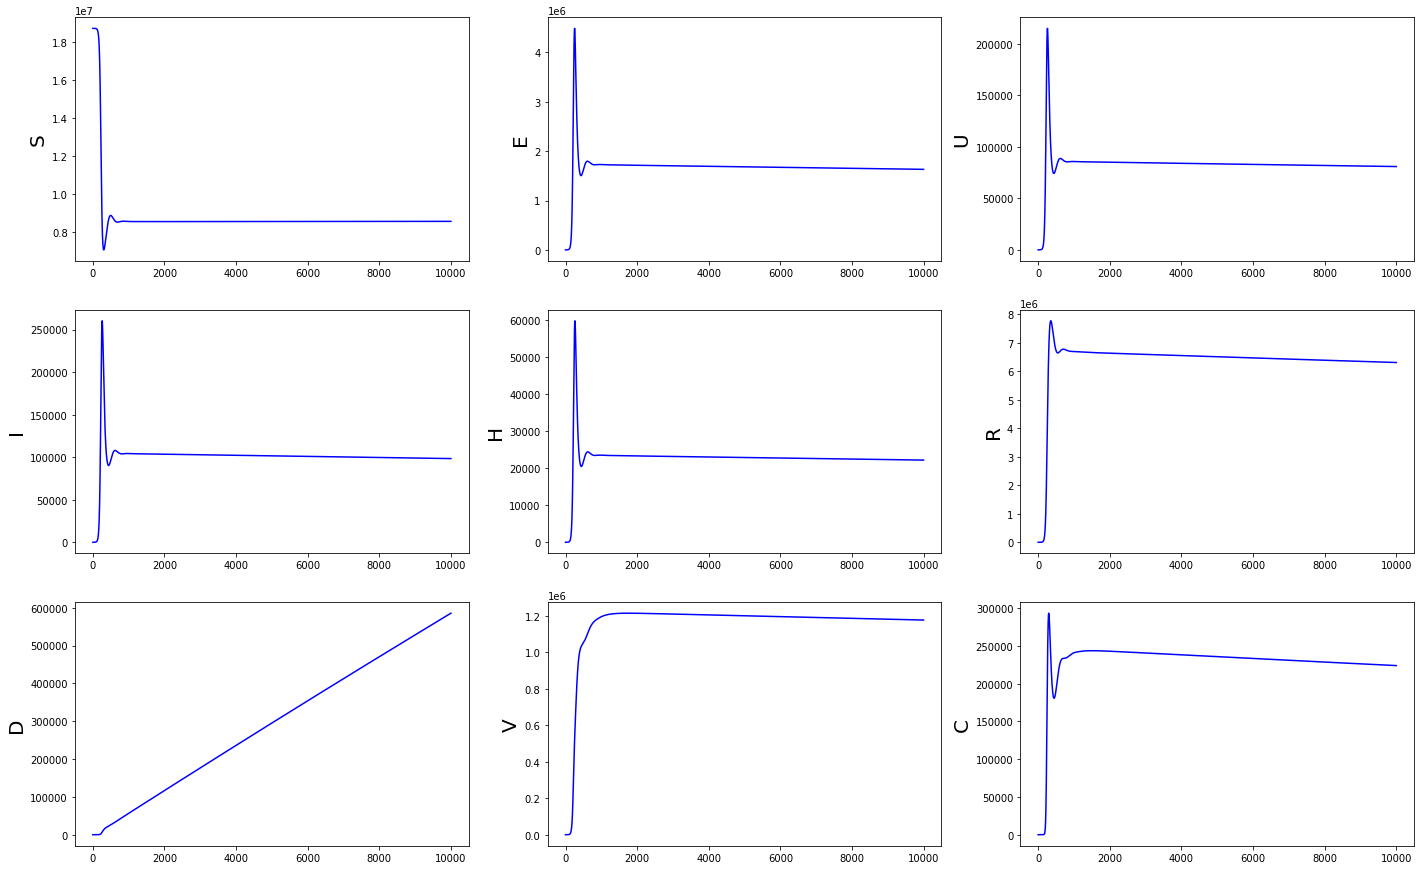

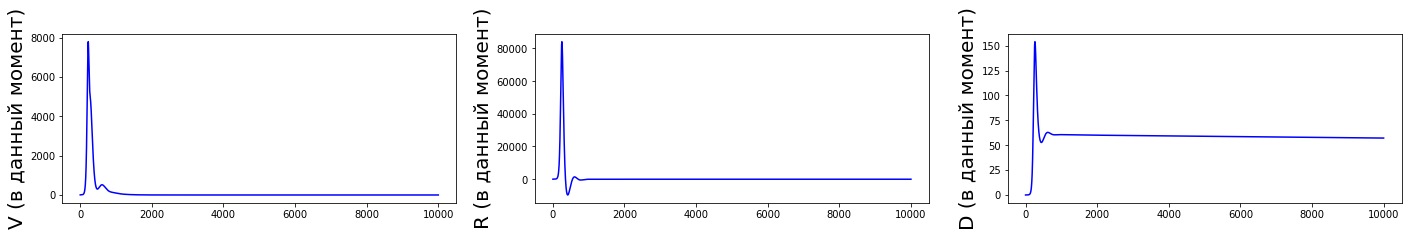

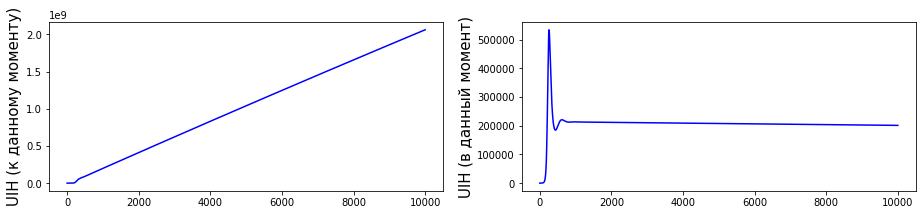

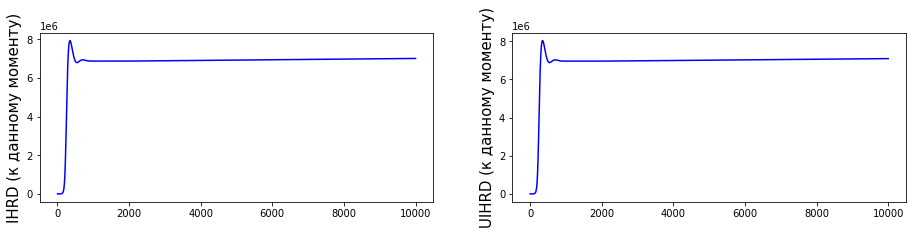

In [1]:
#model 3
import numpy as np
import matplotlib.pyplot as plt

def findLeft(array, length, difference):
    left = 0
    right = length - 1
    max = array[0]
    maxi = 0
    min = array[0]
    mini = 0
    
    for i in range(length):
        if array[i] > max:
            max = array[i]
            maxi = i
        if array[i] < min:
            min = array[i]
            mini = i
    while right < len(array)-1:
        if abs(max - min) < difference: 
            break
        left = left + 1
        right = right + 1
        if array[right] > max:
            max = array[right]
            maxi = right
        if array[right] < min:
            min = array[right]
            mini = right
        
        if left > maxi:
            max = array[left]
            maxi = left
            for i in range(left, right):
                if array[i] > max:
                    max = array[i]
                    maxi = i
        if left > mini:
            min = array[left]
            mini = left
            for i in range(left, right):
                if array[i] < min:
                    min = array[i]
                    mini = i
    return left

stable_days = 200

T = 10000
NN = 18699640
print("Общее количество населения - ", NN)

ne = 13; nu = 4; ni = 5; nh = 7; nc = ne;
nr = 150; nv = 350;
ku = 3.18; ki = 0.171
vh = 0.1; vi = 0.09
pes = 0.679; peu = 0.154; pei = 0.145; peh = 0.022
pcv = 0.900; pcu = 0.050; pci = 0.050
pui = 0.030; pur = 1.0 - pui
pih = 0.021; pir = 1.0 - pih
phd = 0.018; phr = 1.0 - phd

S0 = NN - 140.0; V0 = 0.0; E0 = 140.0; C0 = 0.0; U0 = 0.0; I0 = 0.0; H0 = 0.0; R0 = 0.0; D0 = 0.0

time = [] #  0,1,2, ... T
time.append(0)
time_today = []
for i in range(1, T+1):
    time.append(i)
    time_today.append(i)

################################################--CONTINUOUS_MODEL--###########################################################
S_cont = [];           E_cont = [];           U_cont = [];           I_cont = [];           H_cont = []; 
S_cont.append(S0);     E_cont.append(E0);     U_cont.append(U0);     I_cont.append(I0);     H_cont.append(H0);   
S_cont_vis = [];       E_cont_vis = [];       U_cont_vis = [];       I_cont_vis = [];       H_cont_vis = []; 
S_cont_vis.append(S0); E_cont_vis.append(E0); U_cont_vis.append(U0); I_cont_vis.append(I0); H_cont_vis.append(H0); 
S_cont_vis_today = []; E_cont_vis_today = []; U_cont_vis_today = []; I_cont_vis_today = []; H_cont_vis_today = [];  

R_cont = [];           D_cont = [];           V_cont = [];           C_cont = [];
R_cont.append(R0);     D_cont.append(D0);     V_cont.append(V0);     C_cont.append(C0);    
R_cont_vis = [];       D_cont_vis = [];       V_cont_vis = [];       C_cont_vis = []; 
R_cont_vis.append(R0); D_cont_vis.append(D0); V_cont_vis.append(V0); C_cont_vis.append(C0); 
R_cont_vis_today = []; D_cont_vis_today = []; V_cont_vis_today = []; C_cont_vis_today = [];

UIH_cont_sum = [];
UIH_cont_vis_today = []

IHRD_cont_vis=[];              UIHRD_cont_vis=[];
diffUIH_cont = [];
diffUIH_cont.append(0);




t0 = 0
points = 1
h = 1./points

def f(y, x, a, b):
    return a*y + b

sum_uih_cont = 0
max_cont = 0
uih_p_cont = 0; vc_s_cont = 0; d_s_cont = 0; ih_s_cont = 0; h_s_cont = 0
check_cont = False
check_cont2 = False
maxind_cont = 0
endind_cont = 0
stabind_cont = 0
diffCounter = 0
for i in range(1, T*points+1):
    # S
    kS1 = h * f(S_cont[i-1],             t0,           - (vh * H_cont[i-1] + vi * I_cont[i-1]) / NN - (ku * U_cont[i-1] + ki * I_cont[i-1]) / NN, pes * E_cont[i-1] / ne + R_cont[i-1] / nr + V_cont[i-1] / nv);
    kS2 = h * f(S_cont[i-1] + kS1 / 2.0, t0 + h / 2.0, - (vh * H_cont[i-1] + vi * I_cont[i-1]) / NN - (ku * U_cont[i-1] + ki * I_cont[i-1]) / NN, pes * E_cont[i-1] / ne + R_cont[i-1] / nr + V_cont[i-1] / nv);
    kS3 = h * f(S_cont[i-1] + kS2 / 2.0, t0 + h / 2.0, - (vh * H_cont[i-1] + vi * I_cont[i-1]) / NN - (ku * U_cont[i-1] + ki * I_cont[i-1]) / NN, pes * E_cont[i-1] / ne + R_cont[i-1] / nr + V_cont[i-1] / nv);
    kS4 = h * f(S_cont[i-1] + kS3,       t0 + h,       - (vh * H_cont[i-1] + vi * I_cont[i-1]) / NN - (ku * U_cont[i-1] + ki * I_cont[i-1]) / NN, pes * E_cont[i-1] / ne + R_cont[i-1] / nr + V_cont[i-1] / nv);
    S_cont.append(S_cont[i-1] + (kS1 + 2.0 * kS2 + 2.0 * kS3 + kS4) / 6.0);
    # V
    kV1 = h * f(V_cont[i-1],             t0,           -(ku * U_cont[i-1] + ki * I_cont[i-1]) / NN - 1. / nv, ((vh * H_cont[i-1] + vi * I_cont[i-1]) / NN) * S_cont[i-1] + pcv * C_cont[i-1] / nc);
    kV2 = h * f(V_cont[i-1] + kV1 / 2.0, t0 + h / 2.0, -(ku * U_cont[i-1] + ki * I_cont[i-1]) / NN - 1. / nv, ((vh * H_cont[i-1] + vi * I_cont[i-1]) / NN) * S_cont[i-1] + pcv * C_cont[i-1] / nc);
    kV3 = h * f(V_cont[i-1] + kV2 / 2.0, t0 + h / 2.0, -(ku * U_cont[i-1] + ki * I_cont[i-1]) / NN - 1. / nv, ((vh * H_cont[i-1] + vi * I_cont[i-1]) / NN) * S_cont[i-1] + pcv * C_cont[i-1] / nc);
    kV4 = h * f(V_cont[i-1] + kV3,       t0 + h,       -(ku * U_cont[i-1] + ki * I_cont[i-1]) / NN - 1. / nv, ((vh * H_cont[i-1] + vi * I_cont[i-1]) / NN) * S_cont[i-1] + pcv * C_cont[i-1] / nc);
    V_cont.append(V_cont[i-1] + (kV1 + 2.0 * kV2 + 2.0 * kV3 + kV4) / 6.0);
    # E
    kE1 = h * f(E_cont[i-1],             t0,           -1. / ne, S_cont[i-1] * (ku*U_cont[i-1] + ki * I_cont[i-1]) / NN);
    kE2 = h * f(E_cont[i-1] + kE1 / 2.0, t0 + h / 2.0, -1. / ne, S_cont[i-1] * (ku*U_cont[i-1] + ki * I_cont[i-1]) / NN);
    kE3 = h * f(E_cont[i-1] + kE2 / 2.0, t0 + h / 2.0, -1. / ne, S_cont[i-1] * (ku*U_cont[i-1] + ki * I_cont[i-1]) / NN);
    kE4 = h * f(E_cont[i-1] + kE3,       t0 + h,       -1. / ne, S_cont[i-1] * (ku*U_cont[i-1] + ki * I_cont[i-1]) / NN);
    E_cont.append(E_cont[i-1] + (kE1 + 2.0 * kE2 + 2.0 * kE3 + kE4) / 6.0);
    # C
    kC1 = h * f(C_cont[i-1],             t0,           -1. / nc, V_cont[i-1] * (ku*U_cont[i-1] + ki * I_cont[i-1]) / NN);
    kC2 = h * f(C_cont[i-1] + kC1 / 2.0, t0 + h / 2.0, -1. / nc, V_cont[i-1] * (ku*U_cont[i-1] + ki * I_cont[i-1]) / NN);
    kC3 = h * f(C_cont[i-1] + kC2 / 2.0, t0 + h / 2.0, -1. / nc, V_cont[i-1] * (ku*U_cont[i-1] + ki * I_cont[i-1]) / NN);
    kC4 = h * f(C_cont[i-1] + kC3,       t0 + h,       -1. / nc, V_cont[i-1] * (ku*U_cont[i-1] + ki * I_cont[i-1]) / NN);
    C_cont.append(C_cont[i-1] + (kC1 + 2.0 * kC2 + 2.0 * kC3 + kC4) / 6.0);
    # U
    kU1 = h * f(U_cont[i-1],             t0,           -1. / nu, peu * E_cont[i-1] / ne + pcu * C_cont[i-1] / nc);
    kU2 = h * f(U_cont[i-1] + kU1 / 2.0, t0 + h / 2.0, -1. / nu, peu * E_cont[i-1] / ne + pcu * C_cont[i-1] / nc);
    kU3 = h * f(U_cont[i-1] + kU2 / 2.0, t0 + h / 2.0, -1. / nu, peu * E_cont[i-1] / ne + pcu * C_cont[i-1] / nc);
    kU4 = h * f(U_cont[i-1] + kU3,       t0 + h,       -1. / nu, peu * E_cont[i-1] / ne + pcu * C_cont[i-1] / nc);
    U_cont.append(U_cont[i-1] + (kU1 + 2.0 * kU2 + 2.0 * kU3 + kU4) / 6.0);
    # I
    kI1 = h * f(I_cont[i-1],             t0,           -1. / ni, (pei * E_cont[i-1] / ne + pui * U_cont[i-1] / nu + pci * C_cont[i-1] / nc));
    kI2 = h * f(I_cont[i-1] + kI1 / 2.0, t0 + h / 2.0, -1. / ni, (pei * E_cont[i-1] / ne + pui * U_cont[i-1] / nu + pci * C_cont[i-1] / nc));
    kI3 = h * f(I_cont[i-1] + kI2 / 2.0, t0 + h / 2.0, -1. / ni, (pei * E_cont[i-1] / ne + pui * U_cont[i-1] / nu + pci * C_cont[i-1] / nc));
    kI4 = h * f(I_cont[i-1] + kI3,       t0 + h,       -1. / ni, (pei * E_cont[i-1] / ne + pui * U_cont[i-1] / nu + pci * C_cont[i-1] / nc));
    I_cont.append(I_cont[i-1] + (kI1 + 2.0 * kI2 + 2.0 * kI3 + kI4) / 6.0);
    # H
    kH1 = h * f(H_cont[i-1],             t0,           -1. / nh, (peh * E_cont[i-1] / ne + pih * I_cont[i-1] / ni));
    kH2 = h * f(H_cont[i-1] + kH1 / 2.0, t0 + h / 2.0, -1. / nh, (peh * E_cont[i-1] / ne + pih * I_cont[i-1] / ni));
    kH3 = h * f(H_cont[i-1] + kH2 / 2.0, t0 + h / 2.0, -1. / nh, (peh * E_cont[i-1] / ne + pih * I_cont[i-1] / ni));
    kH4 = h * f(H_cont[i-1] + kH3,       t0 + h,       -1. / nh, (peh * E_cont[i-1] / ne + pih * I_cont[i-1] / ni));
    H_cont.append(H_cont[i-1] + (kH1 + 2.0 * kH2 + 2.0 * kH3 + kH4) / 6.0);
    # R
    kR1 = h * f(R_cont[i-1],             t0,          - 1. / nr, (pur * U_cont[i-1] / nu + pir * I_cont[i-1] / ni + phr * H_cont[i-1] / nh));
    kR2 = h * f(R_cont[i-1] + kR1 / 2.0, t0 + h / 2., - 1. / nr, (pur * U_cont[i-1] / nu + pir * I_cont[i-1] / ni + phr * H_cont[i-1] / nh));
    kR3 = h * f(R_cont[i-1] + kR2 / 2.0, t0 + h / 2., - 1. / nr, (pur * U_cont[i-1] / nu + pir * I_cont[i-1] / ni + phr * H_cont[i-1] / nh));
    kR4 = h * f(R_cont[i-1] + kR3,       t0 + h,      - 1. / nr, (pur * U_cont[i-1] / nu + pir * I_cont[i-1] / ni + phr * H_cont[i-1] / nh));
    R_cont.append(R_cont[i-1] + (kR1 + 2.0 * kR2 + 2.0 * kR3 + kR4) / 6.0);
    # D
    kD1 = h * f(D_cont[i-1],             t0,           0., phd * H_cont[i-1] / nh);
    kD2 = h * f(D_cont[i-1] + kD1 / 2.0, t0 + h / 2.0, 0., phd * H_cont[i-1] / nh);
    kD3 = h * f(D_cont[i-1] + kD2 / 2.0, t0 + h / 2.0, 0., phd * H_cont[i-1] / nh);
    kD4 = h * f(D_cont[i-1] + kD3,       t0 + h,       0., phd * H_cont[i-1] / nh);
    D_cont.append(D_cont[i-1] + (kD1 + 2.0 * kD2 + 2.0 * kD3 + kD4) / 6.0);
    
    if i%points==0:
        S_cont_vis.append(S_cont[i])
        E_cont_vis.append(E_cont[i])
        C_cont_vis.append(C_cont[i])
        U_cont_vis.append(U_cont[i])
        I_cont_vis.append(I_cont[i])
        H_cont_vis.append(H_cont[i])
        R_cont_vis.append(R_cont[i])
        D_cont_vis.append(D_cont[i])
        V_cont_vis.append(V_cont[i])
        
        S_cont_vis_today.append(S_cont[i] - S_cont[i-points])
        E_cont_vis_today.append(E_cont[i] - E_cont[i-points])
        C_cont_vis_today.append(C_cont[i] - C_cont[i-points])
        U_cont_vis_today.append(U_cont[i] - U_cont[i-points])
        I_cont_vis_today.append(I_cont[i] - I_cont[i-points])
        H_cont_vis_today.append(H_cont[i] - H_cont[i-points])
        R_cont_vis_today.append(R_cont[i] - R_cont[i-points])
        D_cont_vis_today.append(D_cont[i] - D_cont[i-points])
        V_cont_vis_today.append(V_cont[i] - V_cont[i-points])
        
        IHRD_cont_vis.append(I_cont[i] + H_cont[i] + R_cont[i] + D_cont[i])
        UIHRD_cont_vis.append(U_cont[i] + I_cont[i] + H_cont[i] + R_cont[i] + D_cont[i])
        UIH_cont_vis_today.append(U_cont[i] + I_cont[i] + H_cont[i])
        
        uih_cont = U_cont[i] + I_cont[i] + H_cont[i]
        sum_uih_cont = sum_uih_cont + uih_cont
        UIH_cont_sum.append(sum_uih_cont)
        if uih_cont>max_cont:
            max_cont=uih_cont
            maxind_cont=i
        
        if check_cont==False and uih_cont<1 and i>500*points:
            endind_cont = i
            check_cont=True
    
    diffUIH_cont.append(U_cont[i] + I_cont[i] + H_cont[i] - (U_cont[i-points] + I_cont[i-points] + H_cont[i-points]))
    
    t0 = t0 + h

stabind_cont = findLeft(diffUIH_cont, stable_days*points, 2)
uih_p_cont = uih_cont
vc_s_cont = V_cont[stabind_cont] + C_cont[i- stable_days*points]
ih_s_cont = I_cont[i- stable_days*points] + H_cont[i- stable_days*points]
h_s_cont = H_cont[i- stable_days*points]
d_s_cont = D_cont[i- stable_days*points]

print("")
print("--------Непрерывная модель--------")
print("Время пика эпидемии - ", int(maxind_cont/points))
print("Максимальное количество единовременно болеющих - ", int(max_cont),", ", format(max_cont*100/NN, '.2f'), "% от общего числа населения")
print("Время стабилизации эпидемии - ", int(stabind_cont/points))
print("Общее число болеющих на момент стабилизации - ", int(uih_p_cont),", ", format(uih_p_cont*100/NN, '.2f'), "% от общего числа населения")
print("Общее число вакцинированных на момент стабилизации - ", int(vc_s_cont),", ", format(vc_s_cont*100/NN, '.2f'), "% от общего числа населения")
print("Общее число умерших на момент стабилизации - ", int(d_s_cont),", ", format(d_s_cont*100/NN, '.2f'), "% от общего числа населения")
print("Общее число выявленных болеющих на момент стабилизации - ", int(ih_s_cont),", ", format(ih_s_cont*100/NN, '.2f'), "% от общего числа населения")
print("Число госпитализированных на момент стабилизации - ", int(h_s_cont),", ", format(h_s_cont*100/NN, '.2f'), "% от общего числа населения")

#####################################################--VISUALIZE--#############################################################
# 1

plt.figure(figsize=(24, 26), facecolor='white')
plt.subplot(5,3,1); plt.plot(time, S_cont_vis, color = 'b'); plt.ylabel('S', fontsize=20, color='black')
plt.subplot(5,3,2); plt.plot(time, E_cont_vis, color = 'b'); plt.ylabel('E', fontsize=20, color='black')
plt.subplot(5,3,3); plt.plot(time, U_cont_vis, color = 'b'); plt.ylabel('U', fontsize=20, color='black')
plt.subplot(5,3,4); plt.plot(time, I_cont_vis, color = 'b'); plt.ylabel('I', fontsize=20, color='black')
plt.subplot(5,3,5); plt.plot(time, H_cont_vis, color = 'b'); plt.ylabel('H', fontsize=20, color='black')
plt.subplot(5,3,6); plt.plot(time, R_cont_vis, color = 'b'); plt.ylabel('R', fontsize=20, color='black')
plt.subplot(5,3,7); plt.plot(time, D_cont_vis, color = 'b'); plt.ylabel('D', fontsize=20, color='black')
plt.subplot(5,3,8); plt.plot(time, V_cont_vis, color = 'b'); plt.ylabel('V', fontsize=20, color='black')
plt.subplot(5,3,9); plt.plot(time, C_cont_vis, color = 'b'); plt.ylabel('С', fontsize=20, color='black')
# 2
plt.figure(figsize=(24, 18))
plt.subplot(5,3,7); plt.plot(time_today, V_cont_vis_today, color = 'b'); plt.ylabel('V (в данный момент)', fontsize=20, color='black')
plt.subplot(5,3,8); plt.plot(time_today, R_cont_vis_today, color = 'b'); plt.ylabel('R (в данный момент)', fontsize=20, color='black')
plt.subplot(5,3,9); plt.plot(time_today, D_cont_vis_today, color = 'b'); plt.ylabel('D (в данный момент)', fontsize=20, color='black')
# 3
plt.figure(figsize=(24, 18), facecolor='white')
plt.subplot(5,3,1); plt.plot(time_today, UIH_cont_sum, color = 'b');       plt.ylabel('UIH (к данному моменту)', fontsize=15, color='black')
plt.subplot(5,3,2); plt.plot(time_today, UIH_cont_vis_today, color = 'b'); plt.ylabel('UIH (в данный момент)', fontsize=15, color='black')
# 4
plt.figure(figsize=(24, 18), facecolor='white')
plt.subplot(5,3,1); plt.plot(time_today,  IHRD_cont_vis, color = 'b');     plt.ylabel('IHRD (к данному моменту)', fontsize=15, color='black')
plt.subplot(5,3,2); plt.plot(time_today, UIHRD_cont_vis, color = 'b');     plt.ylabel('UIHRD (к данному моменту)', fontsize=15, color='black')
